In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r"data/sales_data_sample.csv", encoding='unicode_escape')
# https://www.kaggle.com/datasets/kyanyoga/sample-sales-data?select=sales_data_sample.csv
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# Business Questions to Explore:
1. Revenue breakdown by Country
2. Revenue breakdown by year/month
3. Top 5 customers by revenue/sales quantity
4. Top 5 salespeople by revenue/sales quantity
5. Top 5 products by revenue


# Python Work:
1. Select relevant columns
2. Check/fix datatypes
3. Check/fix missing data
4. Check/fix outlier data
5. Rename columns

### 1. Select relevant columns

In [9]:
colsToDrop = ['PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE']  # For now we'll only drop these.  Can add more later
df.drop(colsToDrop, axis=1, inplace=True)

### 2. Check/fix datatypes

In [16]:
df.info()  # Check datatypes and missing vals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  CITY              2823 non-null   object 
 15  STATE             1337 non-null   object 
 16  COUNTRY           2823 non-null   object 


In [17]:
# ORDERDATE should be date, not object
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

### 3. Check/fix missing data
Saw from df.info that STATE, TERRITORY are the only ones with clearly visible nulls.  It would make sense for one or the other to be null.  Lets make sure there's never a case where both are null.
This is never the case.  As such we seem to have no missing data

In [21]:
df[(df.STATE.isna()) & (df.TERRITORY.isna())] 

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


### 4. Check/fix outlier data

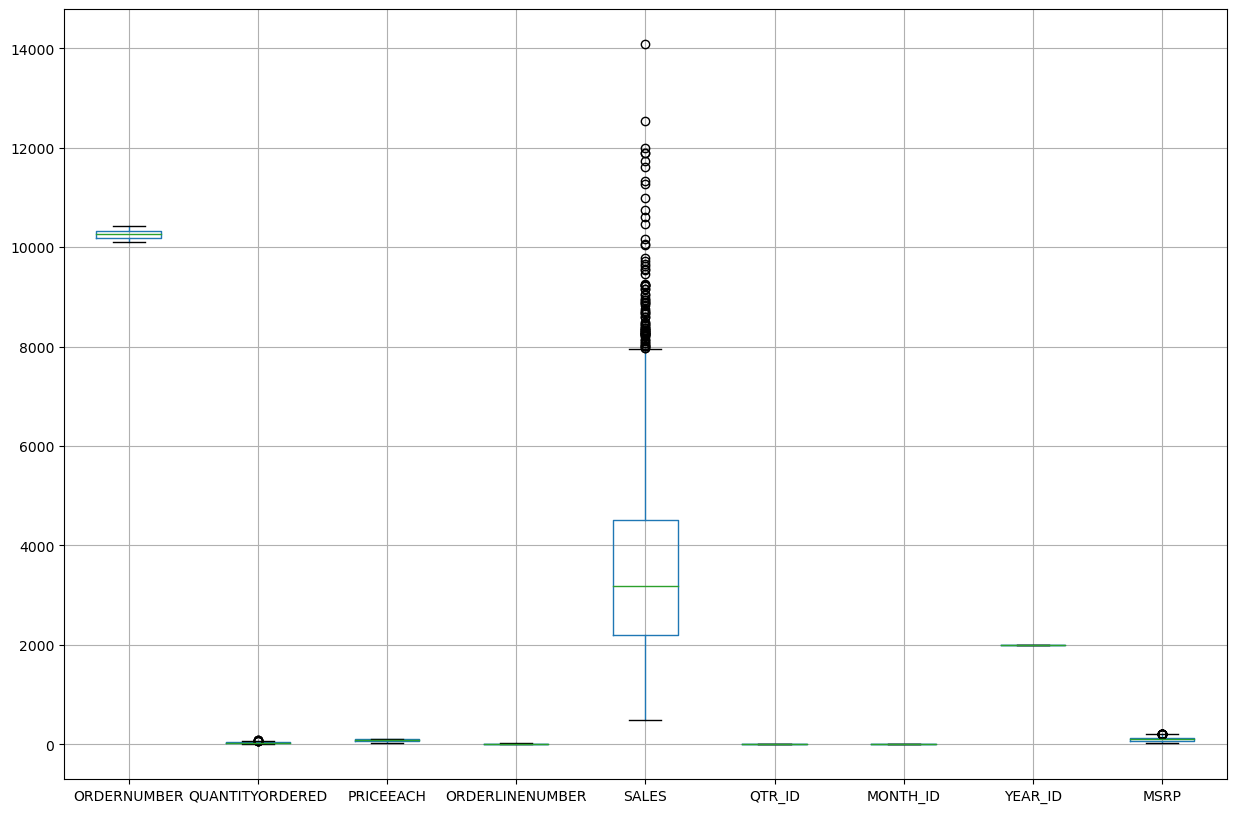

In [23]:
df.boxplot(figsize=(15,10))
plt.show()

Boxplot shows us that QUANTITYORDERED, SALES, and MSRP are the only columns with outliers.  We lack the domain knowledge to definitively remove any of these as unwanted outliers but we will do a short examination of the possibly removable outliers.

In [25]:
salesIQR = df.SALES.quantile(0.75) - df.SALES.quantile(0.25)
salesOut = df[df.SALES > df.SALES.quantile(0.75) + (1.5*salesIQR)]  # df of SALES outliers
msrpIQR = df.MSRP.quantile(0.75) - df.MSRP.quantile(0.25)
msrpOut = df[df.MSRP > df.MSRP.quantile(0.75) + (1.5*msrpIQR)]  # df of MSRP outliers
quantIQR = df.QUANTITYORDERED.quantile(0.75) - df.QUANTITYORDERED.quantile(0.25)
quantOut = df[df.QUANTITYORDERED > df.QUANTITYORDERED.quantile(0.75) + (1.5*quantIQR)]  # df of QUANTITYORDERED outliers

In [27]:
# salesOut
# msrpOut
# quantOut

Examining the outliers gave no reason to discount them based on what we know.  As such, they will be kept in.

### 5. Rename Columns
We will rename our columns to be lowercase, and change the name of 'STATUS' as it conflicts with MySQL statements.

In [52]:
df.rename(str.lower, axis='columns', inplace=True)  # lowercase all col names
df.rename({'status':'shipping', 'state':'statename'}, axis='columns',inplace=True)  # Change 'status' col name


In [53]:
df.to_csv(r"data/salesSampleCleaned.csv",index=False)

In [54]:
df.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,shipping,qtr_id,month_id,year_id,...,msrp,productcode,customername,city,statename,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,95,S10_1678,Land of Toys Inc.,NYC,NY,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,95,S10_1678,Reims Collectables,Reims,NaN,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,95,S10_1678,Lyon Souveniers,Paris,NaN,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,95,S10_1678,Toys4GrownUps.com,Pasadena,CA,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,95,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,USA,NaN,Brown,Julie,Medium


In [51]:
max([len(x) for x in df.customername])

34

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2822
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ordernumber       2823 non-null   int64         
 1   quantityordered   2823 non-null   int64         
 2   priceeach         2823 non-null   float64       
 3   orderlinenumber   2823 non-null   int64         
 4   sales             2823 non-null   float64       
 5   orderdate         2823 non-null   datetime64[ns]
 6   shipping          2823 non-null   object        
 7   qtr_id            2823 non-null   int64         
 8   month_id          2823 non-null   int64         
 9   year_id           2823 non-null   int64         
 10  productline       2823 non-null   object        
 11  msrp              2823 non-null   int64         
 12  productcode       2823 non-null   object        
 13  customername      2823 non-null   object        
 14  city              2823 n